### lib import

In [18]:
import requests

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import koreanize_matplotlib

### mysql connection code

In [ ]:
# mysql module
import mysql.connector

# connect_database( hostname , username , password )
def connect_database(host_name="host_name", user_name="user_name", user_password="user_password"):
    mydb = mysql.connector.connect(
        host = host_name,
        port = 3306,
        user = user_name,
        password = user_password,
        database = "WAY_BACK_HOME"
    )

    cursor = mydb.cursor()

    return mydb, cursor

def close_database(mydb, cursor):
    cursor.close()
    mydb.close()

# 
def excute_query(query):
    mydb, cursor = connect_database()
    try:
        cursor.execute(query);

        if query.strip().lower().startswith("select"):
            return cursor.fetchall()
        else :
            mydb.commit()
            print("success!!!")

    except mysql.connector.Error as err:
        print(err)

    finally:
        close_database(mydb=mydb,cursor=cursor)

### kosis open api

In [5]:
def make_conversion_variable(start_date, end_date, key):# 지역별 전월세전환율
    conversion_rate_url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"
    conversion_rate_params = {
        'method': 'getList',
        'apiKey': key, # 고유 api number
        'itmId': 'T1+', # 항목 ID
        # objL1 ~ objL8 추가 사항, 없으면 all, 전부 다 가져온다는 뜻
        'objL1': 'ALL',
        'objL2': 'ALL',
        'objL3': '',
        'objL4': '',
        'objL5': '',
        'objL6': '',
        'objL7': '',
        'objL8': '',
        'format': 'json', # DATA FORMAT
        'jsonVD': 'Y',
        'prdSe': 'M', # 기간 설정 주기
        'startPrdDe': start_date,#'201701', # START DATE
        'endPrdDe': end_date,#'201901', # END DATE
        # 'outputFields': 'ORG_ID+TBL_ID+OBJ_ID+PRD_DE+', # 어떤 거 만 추가할건지, OUTPUT
        'orgId': '408', # 기관 코드
        'tblId': 'DT_30404_N0010' # 통계표 ID
    }

    return conversion_rate_url,conversion_rate_params

def make_meme_variable(start_date, end_date, key): # 유형별 매매가격지수
    meme_url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"
    meme_params = {
        'method': 'getList',
        'apiKey': key, # 고유 api number
        'itmId': 'sales+', # 항목 ID
        # objL1 ~ objL8 추가 사항, 없으면 all, 전부 다 가져온다는 뜻
        'objL1': 'ALL',
        'objL2': 'ALL',
        'objL3': '',
        'objL4': '',
        'objL5': '',
        'objL6': '',
        'objL7': '',
        'objL8': '',
        'format': 'json', # DATA FORMAT
        'jsonVD': 'Y',
        'prdSe': 'M', # 기간 설정 주기
        'startPrdDe': start_date,#'201701', # START DATE
        'endPrdDe': end_date,#'201901', # END DATE
        # 'outputFields': 'ORG_ID+TBL_ID+OBJ_ID+PRD_DE+', # 어떤 거 만 추가할건지, OUTPUT
        'orgId': '408', # 기관 코드
        'tblId': 'DT_40803_N0001' # 통계표 ID
    }

    return meme_url, meme_params

def make_property_jeonse_ratio_variable(start_date, end_date, key): # 유형별 매매가격지수
    meme_rate_url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"
    meme_rate_params = {
        'method': 'getList',
        'apiKey': key, # 고유 api number
        'itmId': 'rate+', # 항목 ID
        # objL1 ~ objL8 추가 사항, 없으면 all, 전부 다 가져온다는 뜻
        'objL1': 'ALL',
        'objL2': 'ALL',
        'objL3': '',
        'objL4': '',
        'objL5': '',
        'objL6': '',
        'objL7': '',
        'objL8': '',
        'format': 'json', # DATA FORMAT
        'jsonVD': 'Y',
        'prdSe': 'M', # 기간 설정 주기
        'startPrdDe': start_date,#'201701', # START DATE
        'endPrdDe': end_date,#'201901', # END DATE
        # 'outputFields': 'ORG_ID+TBL_ID+OBJ_ID+PRD_DE+', # 어떤 거 만 추가할건지, OUTPUT
        'orgId': '408', # 기관 코드
        'tblId': 'DT_30404_N0006_R1' # 통계표 ID
    }

    return meme_rate_url, meme_rate_params
# test
# key = 'ODA4ZjhhYzdmMGM1ZTI5NjA4ZWIzNmYyNmE5MjE2N2M='
# conversion_rate_url, conversion_rate_params = make_conversion_variable('201701','201901',key)

In [17]:
# request 요청 보낸 후 response 반환
def get_request_data(url, parameter):
    # GET 요청 보내기
    response = requests.get(url, params=parameter)
    try: 
        # 응답 데이터 확인
        if response.status_code == 200:
            json_data = response.json()  # JSON 데이터 파싱
            print('response status succeess')
        else:
            print(f"Error: {response.status_code}")
    finally:
        return json_data

In [39]:
# 날짜 주기 반환 하는 코드
# 요청 시 파라메터에 넣을 날짜를 넣어줘야 하는데 단위가 40000건 이상 조회가
# 한번에 되지 않아서 1년 주기로 나누기 위해 날짜 주기를 만들어주는 코드
def make_period(start_year, end_year, need_month=None):

    date_strings = []

    for year in range(start_year, end_year + 1):

        if ( need_month == True ):
            for month in range (1,13):
                date_strings.append(f"{str(year)}{month:02d}")\
        
        else :
            date_strings.append(str(year))
    
    return date_strings

def make_period_2(start_year, end_year, need_month=None):
    date_strings = []

    for year in range(start_year, end_year + 1):
        if need_month: 
            for month in range(1, 13):
                date_strings.append(f"{year}{month:02d}") 
        else:  #
            date_strings.append(str(year))  
    
    return date_strings

# 사용 예시
print(make_period_2(2020, 2022, True))  # 월 단위로 출력
# print(make_period_2(2020, 2022, False))  # 년 단위로 출력


# function test
test = make_period(2011,2024)
print(test)

['202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112', '202201', '202202', '202203', '202204', '202205', '202206', '202207', '202208', '202209', '202210', '202211', '202212']
['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


In [22]:
# KOSIS API KEY
key = 'ODA4ZjhhYzdmMGM1ZTI5NjA4ZWIzNmYyNmE5MjE2N2M='
regions_list = []

def bring_kosis_conversion_data(first_date, last_date, key):
    # need url and params
    conversion_rate_url, conversion_rate_params = make_conversion_variable(first_date,last_date,key)


    json_data =get_request_data(conversion_rate_url,conversion_rate_params)

    # conversion_rate all data
    conversion_rate_data = []

    # chart variable
    y_list =[]; x_list =[]


    for idx in json_data:
        # if (idx['C1_NM'] == '아파트' and idx['C2_NM'] == '서울'):

        regions_list.append(idx['C2_NM'])

        if (idx['C1_NM'] == '아파트' and (idx['C2_NM'] == '서울' or idx['C2_NM'] == '수도권' or idx['C2_NM'] == '대구')):
            conversion_rate_data.append((idx['PRD_DE'],idx['C1_NM'],idx['C2_NM'],float(idx['DT'])))
            x_list.append(float(idx['DT']))
            y_list.append(idx['PRD_DE'])
    
    return conversion_rate_data, x_list, y_list

def bring_kosis_meme_data(first_date, last_date, key):
    
    # (단위: 2021.6 = 100.0)

    meme_url, meme_params = make_meme_variable(first_date,last_date,key)

    json_data = get_request_data(meme_url,meme_params)
    meme_data = []

    y_list =[]; x_list =[]

    for idx in json_data:
        # if (idx['C1_NM'] == '아파트' and idx['C2_NM'] == '서울'):
        if (idx['C1_NM'] == '아파트'):
            meme_data.append((idx['PRD_DE'],idx['C1_NM'],idx['C2_NM'],float(idx['DT'])))
            x_list.append(float(idx['DT']))
            y_list.append(idx['PRD_DE'])

    # PRD_DE: 날짜 DT:값
    # C1_NM: 건물 종류
    # C2_NM: 지역명
    
    return meme_data, x_list, y_list

def bring_kosis_property_jeonse_ratio_data(first_date, last_date, key):

    property_jeonse_ratio_url, property_jeonse_ratio_params = make_property_jeonse_ratio_variable(first_date,last_date,key)

    json_data = get_request_data(property_jeonse_ratio_url,property_jeonse_ratio_params)
    property_jeonse_ratio_data = []

    y_list =[]; x_list =[]

    for idx in json_data:
        # if (idx['C1_NM'] == '아파트' and idx['C2_NM'] == '서울'):
        if (idx['C1_NM'] == '아파트' and (idx['C2_NM'] == '서울' or idx['C2_NM'] == '수도권' or idx['C2_NM'] == '대구')):
            property_jeonse_ratio_data.append((idx['PRD_DE'],idx['C1_NM'],idx['C2_NM'],float(idx['DT'])))
            x_list.append(float(idx['DT']))
            y_list.append(idx['PRD_DE'])

    # PRD_DE: 날짜 DT:값
    # C1_NM: 건물 종류
    # C2_NM: 지역명
    
    return property_jeonse_ratio_data, x_list, y_list

In [18]:
period_list = make_period(2011,2024)
search_list = []
last_month = '07'
for period in period_list:
    if period == period_list[-1]:
        search_list.append((period+'01',period+last_month))
    else:
        search_list.append((period+'01',period+'12'))

# 월세율
# KOSIS API KEY
key = 'ODA4ZjhhYzdmMGM1ZTI5NjA4ZWIzNmYyNmE5MjE2N2M='
rent_price = []; rent_date = [];
mydb, cursor = connect_database()
for first_date, secode_date in search_list:
    
    x_list=[]; y_list=[];
    
    conversion_rate_data, x_list, y_list = bring_kosis_conversion_data(first_date=first_date,last_date=secode_date,key=key)
    
    rent_price += (x_list); rent_date += (y_list);

    for conversion_rate in conversion_rate_data:
        print(conversion_rate)
        # region_name에 해당하는 region_id 조회
        cursor.execute("SELECT region_id FROM regions WHERE region_name = %s", (conversion_rate[2],))
        result = cursor.fetchone()
        
        if result:

            region_id = result[0]
            year = f"{conversion_rate[0][:4]}-{conversion_rate[0][4:6]}-00"
            cursor.execute(
            "INSERT INTO rent_conversion_rate (region_id, date, building_type, conversion_rate) VALUES (%s, %s, %s, %s)",
            (region_id, year, conversion_rate[1], conversion_rate[3])
            )
            print(f"{conversion_rate[2]}의 {year} 데이터가 rent_conversion_rate에 삽입되었습니다. (conversion_rate: {conversion_rate[3]})")

# mydb.commit()
cursor.close()
mydb.close()

response status succeess
('201101', '아파트', '수도권', 8.1)
('201102', '아파트', '수도권', 8.1)
('201103', '아파트', '수도권', 8.1)
('201104', '아파트', '수도권', 8.1)
('201105', '아파트', '수도권', 8.1)
('201106', '아파트', '수도권', 8.1)
('201107', '아파트', '수도권', 8.0)
('201108', '아파트', '수도권', 8.0)
('201109', '아파트', '수도권', 8.0)
('201110', '아파트', '수도권', 8.0)
('201111', '아파트', '수도권', 7.9)
('201112', '아파트', '수도권', 7.8)
('201101', '아파트', '서울', 7.4)
('201102', '아파트', '서울', 7.4)
('201103', '아파트', '서울', 7.4)
('201104', '아파트', '서울', 7.4)
('201105', '아파트', '서울', 7.4)
('201106', '아파트', '서울', 7.4)
('201107', '아파트', '서울', 7.3)
('201108', '아파트', '서울', 7.3)
('201109', '아파트', '서울', 7.2)
('201110', '아파트', '서울', 7.2)
('201111', '아파트', '서울', 7.2)
('201112', '아파트', '서울', 7.1)
('201101', '아파트', '대구', 7.6)
('201102', '아파트', '대구', 7.6)
('201103', '아파트', '대구', 7.6)
('201104', '아파트', '대구', 7.6)
('201105', '아파트', '대구', 7.6)
('201106', '아파트', '대구', 7.6)
('201107', '아파트', '대구', 7.5)
('201108', '아파트', '대구', 7.4)
('201109', '아파트', '대구', 7.4)
('2011

KeyboardInterrupt: 

In [19]:
# 지역 코드 중복 제거 후 db에 삽입
regions =[]

[regions.append(x) for x in regions_list if x not in regions]

for region in regions:
    regions_insert_query = f"""INSERT INTO regions(region_name) VALUES('{region}');"""
    print(regions_insert_query)
    excute_query(regions_insert_query)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [24]:
# 수록기간 : 월 2012.01 ~ 2024.08 /
period_list = make_period(2012,2024)
search_list = []
last_month = '08'
for period in period_list:
    if period == period_list[-1]:
        search_list.append((period+'01',period+last_month))
    else:
        search_list.append((period+'01',period+'12'))

# 월세율
# KOSIS API KEY
key = 'ODA4ZjhhYzdmMGM1ZTI5NjA4ZWIzNmYyNmE5MjE2N2M='
rent_price = []; rent_date = [];
mydb, cursor = connect_database()
for first_date, secode_date in search_list:
    
    x_list=[]; y_list=[];
    
    conversion_rate_data, x_list, y_list = bring_kosis_property_jeonse_ratio_data(first_date=first_date,last_date=secode_date,key=key)
    
    rent_price += (x_list); rent_date += (y_list);

    for conversion_rate in conversion_rate_data:
        print(conversion_rate)
        # region_name에 해당하는 region_id 조회
        cursor.execute("SELECT region_id FROM regions WHERE region_name = %s", (conversion_rate[2],))
        result = cursor.fetchone()
        
        if result:

            region_id = result[0]
            year = f"{conversion_rate[0][:4]}-{conversion_rate[0][4:6]}-00"
            cursor.execute(
            "INSERT INTO property_jeonse_ratio (region_id, date, building_type, ratio) VALUES (%s, %s, %s, %s)",
            (region_id, year, conversion_rate[1], conversion_rate[3])
            )
            print(f"{conversion_rate[2]}의 {year} 데이터가 property_jeonse_ratio에 삽입되었습니다. (property_jeonse_ratio: {conversion_rate[3]})")

mydb.commit()
cursor.close()
mydb.close()

response status succeess
('201201', '아파트', '수도권', 56.60059433)
수도권의 2012-01-00 데이터가 property_jeonse_ratio에 삽입되었습니다. (property_jeonse_ratio: 56.60059433)
('201202', '아파트', '수도권', 56.73352688)
수도권의 2012-02-00 데이터가 property_jeonse_ratio에 삽입되었습니다. (property_jeonse_ratio: 56.73352688)
('201203', '아파트', '수도권', 56.85039827)
수도권의 2012-03-00 데이터가 property_jeonse_ratio에 삽입되었습니다. (property_jeonse_ratio: 56.85039827)
('201204', '아파트', '수도권', 56.95877101)
수도권의 2012-04-00 데이터가 property_jeonse_ratio에 삽입되었습니다. (property_jeonse_ratio: 56.95877101)
('201205', '아파트', '수도권', 57.11203774)
수도권의 2012-05-00 데이터가 property_jeonse_ratio에 삽입되었습니다. (property_jeonse_ratio: 57.11203774)
('201206', '아파트', '수도권', 57.33889656)
수도권의 2012-06-00 데이터가 property_jeonse_ratio에 삽입되었습니다. (property_jeonse_ratio: 57.33889656)
('201207', '아파트', '수도권', 57.45912337)
수도권의 2012-07-00 데이터가 property_jeonse_ratio에 삽입되었습니다. (property_jeonse_ratio: 57.45912337)
('201208', '아파트', '수도권', 57.73474275)
수도권의 2012-08-00 데이터가 property_jeonse_rati

In [23]:
cursor.close()
mydb.close()

### 테스트 코드

In [45]:
# 매매가 지수
# KOSIS API KEY
key = 'ODA4ZjhhYzdmMGM1ZTI5NjA4ZWIzNmYyNmE5MjE2N2M='
meme_price = []; meme_date =[];

first_date='2003'; secode_date='2024'

# mydb, cursor = connect_database()

for first_date, secode_date in search_list:
    
    x_list=[]; y_list=[];
    
    meme_data, x_list, y_list  = bring_kosis_meme_data(first_date=first_date,last_date=secode_date,key=key)

    meme_price += (x_list); meme_date += (y_list);

    print(f"{meme_data[0]} 가져오는 중...")

print(len(meme_price),len(meme_date))

response status succeess
('201101', '아파트', '서울', 79.62573228) 가져오는 중...
response status succeess
('201201', '아파트', '서울', 78.99650647) 가져오는 중...
response status succeess
('201301', '아파트', '서울', 73.48170607) 가져오는 중...
response status succeess
('201401', '아파트', '서울', 73.21236066) 가져오는 중...
response status succeess
('201501', '아파트', '서울', 74.55512277) 가져오는 중...
response status succeess
('201601', '아파트', '서울', 79.48246228) 가져오는 중...
response status succeess
('201701', '아파트', '서울', 82.04548796) 가져오는 중...
response status succeess
('201801', '아파트', '서울', 87.02571033) 가져오는 중...
response status succeess
('201901', '아파트', '서울', 92.39283284) 가져오는 중...
response status succeess
('202001', '아파트', '서울', 94.22023947) 가져오는 중...
response status succeess
('202101', '아파트', '서울', 97.00963362) 가져오는 중...
response status succeess
('202201', '아파트', '서울', 104.3822122) 가져오는 중...
response status succeess
('202301', '아파트', '서울', 94.62227894) 가져오는 중...
response status succeess
('202401', '아파트', '서울', 94.07696788) 가져

In [ ]:
# 매매가율
# KOSIS API KEY
key = 'ODA4ZjhhYzdmMGM1ZTI5NjA4ZWIzNmYyNmE5MjE2N2M='
meme_rate_price = []; meme_rate_date =[];

first_date='2003'; secode_date='2024'

# mydb, cursor = connect_database()

for first_date, secode_date in search_list:
    
    x_list=[]; y_list=[];
    
    meme_data, x_list, y_list  = bring_kosis_meme_data(first_date=first_date,last_date=secode_date,key=key)

    meme_price += (x_list); meme_date += (y_list);

    print(f"{meme_data[0]} 가져오는 중...")

print(len(meme_price),len(meme_date))

In [11]:
def draw_line_pic(x,y,title):
    plt.figure(figsize=(20, 10))
    plt.plot(y, x, marker='o', color='blue', linestyle='-', linewidth=2) 
    plt.xlabel('기간')
    plt.ylabel('값', fontsize=5)
    plt.title(title);
    plt.xticks(rotation=90);
    plt.show();

def draw_line_pic2(plt,x,y,title,label,color):
    plt.plot(x, y, marker='o', color=color, linestyle='-', linewidth=2,label=label)
    plt.xlabel('기간')
    plt.ylabel('값', fontsize=5)
    plt.title(title);
    plt.xticks(rotation=90);
    plt.show();
draw_line_pic(rent_price,rent_date,title="2011.01 ~ 2024.07 서울 전월세 전환율")
draw_line_pic(meme_price,meme_date,title="2003.11 ~ 2024.09 서울 아파트 매매가")

### unsold_houses 테스트 시각화 코드

In [6]:
mydb, cursor = connect_database()
q = "select * from unsold_houses where 지역 = '서울';"
results = excute_query(q)
close_database(mydb,cursor)

1146 (42S02): Table 'WAY_BACK_HOME.unsold_houses' doesn't exist


In [7]:
unsold_houses = []
for i in range(0, len(results), 8):
    unsold_houses.append(results[i])

TypeError: object of type 'NoneType' has no len()

In [17]:
unsold_date = []; unsold_price = [];
for i in unsold_houses:
    unsold_price.append(i[2])
    unsold_date.append(i[0])

In [27]:
mydb, cursor = connect_database()
q = "select * from HOUSE_PRICE_INDEX_APART;"
results = excute_query(q)
close_database(mydb,cursor)

In [30]:
house_price_index_apart = results

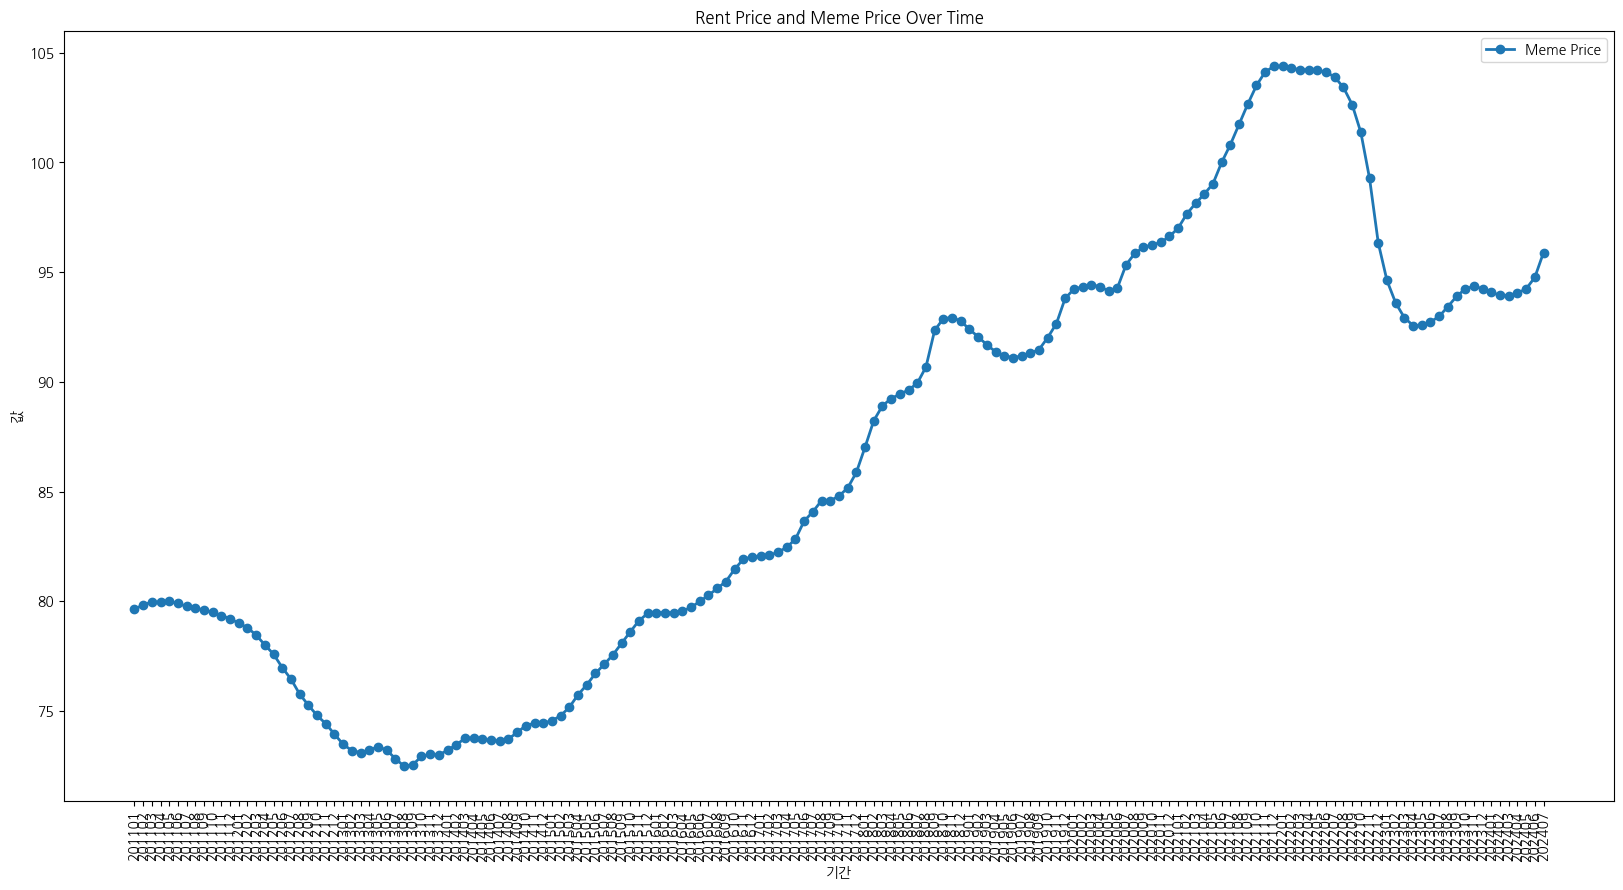

In [41]:
plot_x_list = make_period(2000,2024,True)

filtered_rent_x = []; filtered_rent_price = []; 
filtered_meme_x = []; filtered_meme_price = [];
filtered_unsold_x = []; filtered_unsold_price = [];

for date in plot_x_list:
    for rent in rent_date:

        if date == rent:
            filtered_rent_x.append(date)
            filtered_rent_price.append(rent_price[rent_date.index(date)])
    
    for meme in meme_date:

        if date == meme:
            filtered_meme_x.append(date)
            filtered_meme_price.append(meme_price[meme_date.index(date)])

    for unsold in unsold_date:

        if date == unsold:
            filtered_unsold_x.append(date)
            filtered_unsold_price.append(unsold_price[unsold_date.index(date)])
    
    for hp in house_price_index_apart:
        

# plt.figure(figsize=(22,15))

# 플롯 초기화
plt.figure(figsize=(20, 10))

# Rent Price 데이터 그리기
# plt.plot(filtered_rent_x, filtered_rent_price, marker='o', linestyle='-', linewidth=2, label='Rent Price')

# Meme Price 데이터 그리기
plt.plot(filtered_meme_x, filtered_meme_price, marker='o', linestyle='-', linewidth=2, label='Meme Price')

# unsold 름닝ㄹ문이라무닐ㅇ ㅏ무닝라ㅜ
# plt.plot(filtered_unsold_x, filtered_unsold_price, marker='o', linestyle='-', linewidth=2, label='Meme Price')

# 플롯 설정
plt.xlabel('기간')
plt.ylabel('값', fontsize=10)
plt.title('Rent Price and Meme Price Over Time')
plt.xticks(rotation=90)
plt.legend()

# 그래프 표시
plt.show()
# # 데이터 그리기
# plt.plot(filtered_x, filtered_rent_price, marker='o', linestyle='-', linewidth=2, label='Rent Price') 
# plt.xlabel('기간')
# plt.ylabel('값', fontsize=10)
# plt.title('Rent Price Over Time')
# plt.xticks(rotation=90)

# # 범례 추가
# plt.legend()
# plt.show()

# draw_line_pic2(plt, meme_price , plot_x_list, "매매가", "매매가")
# draw_line_pic2(plt, rent_price , plot_x_list, "전세율", "전세율")

In [35]:
x_cnr = []; sudo=[]; seo=[]; degu=[];

for hp in house_price_index_apart:
    x_cnr.append(hp[0])
    sudo.append(hp[1])
    seo.append(hp[2])
    degu.append(hp[3])

In [5]:

plt.figure(figsize=(20, 10))

# Rent Price 데이터 그리기
# plt.plot(x_cnr, sudo, marker='o', linestyle='-', linewidth=2, label='sudo Price')
plt.plot(x_cnr, seo, marker='o', linestyle='-', linewidth=2, label='seo Price')
plt.plot(x_cnr, degu, marker='o', linestyle='-', linewidth=2, label='degu Price')

#

# unsold 름닝ㄹ문이라무닐ㅇ ㅏ무닝라ㅜ
plt.plot(filtered_unsold_x, filtered_unsold_price, marker='o', linestyle='-', linewidth=2, label='Meme Price')

# 플롯 설정
plt.xlabel('기간')
plt.ylabel('값', fontsize=10)
plt.title('Rent Price and Meme Price Over Time')
plt.xticks(rotation=90)
plt.legend()

# 그래프 표시
plt.show()

NameError: name 'x_cnr' is not defined

<Figure size 2000x1000 with 0 Axes>

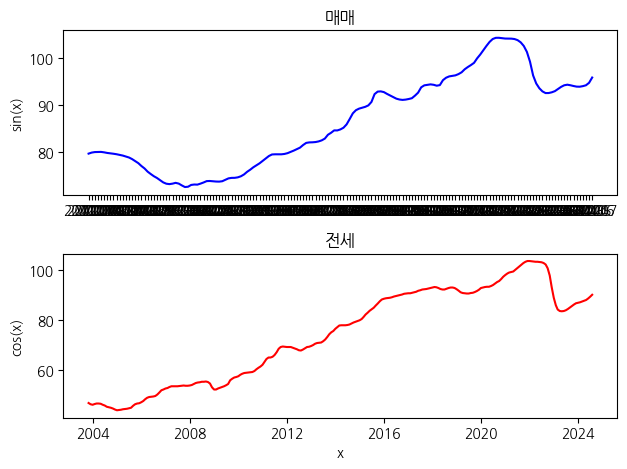

In [43]:

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1)  # 2행 1열의 서브 플롯

# 첫 번째 서브 플롯
ax1.plot(filtered_meme_x, filtered_meme_price, color='blue')
ax1.set_title('매매')
ax1.set_ylabel('sin(x)')

# 두 번째 서브 플롯
ax2.plot(x_cnr, seo, color='red')
ax2.set_title('전세')
ax2.set_xlabel('x')
ax2.set_ylabel('cos(x)')

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [9]:
results = excute_query("select DATE_FORMAT(date, '%Y-%m') as month_only from property_jeonse_ratio;")


In [10]:
results

[('2012-01',),
 ('2012-02',),
 ('2012-03',),
 ('2012-04',),
 ('2012-05',),
 ('2012-06',),
 ('2012-07',),
 ('2012-08',),
 ('2012-09',),
 ('2012-10',),
 ('2012-11',),
 ('2012-12',),
 ('2013-01',),
 ('2013-02',),
 ('2013-03',),
 ('2013-04',),
 ('2013-05',),
 ('2013-06',),
 ('2013-07',),
 ('2013-08',),
 ('2013-09',),
 ('2013-10',),
 ('2013-11',),
 ('2013-12',),
 ('2014-01',),
 ('2014-02',),
 ('2014-03',),
 ('2014-04',),
 ('2014-05',),
 ('2014-06',),
 ('2014-07',),
 ('2014-08',),
 ('2014-09',),
 ('2014-10',),
 ('2014-11',),
 ('2014-12',),
 ('2015-01',),
 ('2015-02',),
 ('2015-03',),
 ('2015-04',),
 ('2015-05',),
 ('2015-06',),
 ('2015-07',),
 ('2015-08',),
 ('2015-09',),
 ('2015-10',),
 ('2015-11',),
 ('2015-12',),
 ('2016-01',),
 ('2016-02',),
 ('2016-03',),
 ('2016-04',),
 ('2016-05',),
 ('2016-06',),
 ('2016-07',),
 ('2016-08',),
 ('2016-09',),
 ('2016-10',),
 ('2016-11',),
 ('2016-12',),
 ('2017-01',),
 ('2017-02',),
 ('2017-03',),
 ('2017-04',),
 ('2017-05',),
 ('2017-06',),
 ('2017-07

### 서울 시 혼인건수

In [1]:
def make_marriages_variable(start_date, end_date, key): # 유형별 매매가격지수
    marriages_url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"
    marriages_params = {
        'method': 'getList',
        'apiKey': key, # 고유 api number
        'itmId': 'T3+', # 항목 ID
        # objL1 ~ objL8 추가 사항, 없으면 all, 전부 다 가져온다는 뜻
        'objL1': '00+11+21+22+23+24+25+26+29+31+32+33+34+35+36+37+38+39+90+',
        'objL2': '',
        'objL3': '',
        'objL4': '',
        'objL5': '',
        'objL6': '',
        'objL7': '',
        'objL8': '',
        'format': 'json', # DATA FORMAT
        'jsonVD': 'Y',
        'prdSe': 'M', # 기간 설정 주기
        'startPrdDe': start_date,#'201701', # START DATE
        'endPrdDe': end_date,#'201901', # END DATE
        # 'outputFields': 'ORG_ID+TBL_ID+OBJ_ID+PRD_DE+', # 어떤 거 만 추가할건지, OUTPUT
        'orgId': '101', # 기관 코드
        'tblId': 'INH_1B83A35' # 통계표 ID
    }

    return marriages_url, marriages_params

In [9]:
period_list = make_period(1997,2023)
search_list = []
last_month = '12'
for period in period_list:
    if period == period_list[-1]:
        search_list.append((period+'01',period+last_month))
    else:
        search_list.append((period+'01',period+'12'))

In [20]:
key = 'ODA4ZjhhYzdmMGM1ZTI5NjA4ZWIzNmYyNmE5MjE2N2M='

mydb, cursor = connect_database()

for first_date, secode_date in search_list:
    marriages_url, marriages_params =  make_marriages_variable(first_date,secode_date,key)

    json_data = get_request_data(marriages_url,marriages_params)

    marriages_data = []

    for idx in json_data:
        print(idx['C1_NM'])
        if idx['C1_NM'] == '서울특별시' or idx['C1_NM'] == '대구광역시':

            if idx['C1_NM'] == '서울특별시':
                named = '서울'
            elif idx['C1_NM'] == '대구광역시':
                named = '대구'

            cursor.execute(f"SELECT region_id FROM regions WHERE region_name = '{named}';")
            result = cursor.fetchone()
            
            if result:
                
                region_id = result[0]

                year = f"{idx['PRD_DE'][:4]}"
                month = f"{idx['PRD_DE'][4:6]}"

                # marriages_data.append((idx['C1_NM'],idx['DT'],idx['PRD_DE']))
                cursor.execute(
                "INSERT INTO marriages (region_id, year,month, number) VALUES (%s, %s, %s, %s)",
                (region_id, year, month, idx['DT'])
                )
                print(f"{region_id, year, month, idx['DT']} 값 insert")
            
            else:
                print(f"{region_id, year, month, idx['DT']} 값 누락")

mydb.commit()
cursor.close()
mydb.close()

response status succeess
전국
전국
전국
전국
전국
전국
전국
전국
전국
전국
전국
전국
서울특별시
(19, '1997', '01', '8000') 값 insert
서울특별시
(19, '1997', '02', '6238') 값 insert
서울특별시
(19, '1997', '03', '7428') 값 insert
서울특별시
(19, '1997', '04', '7965') 값 insert
서울특별시
(19, '1997', '05', '9776') 값 insert
서울특별시
(19, '1997', '06', '8591') 값 insert
서울특별시
(19, '1997', '07', '6747') 값 insert
서울특별시
(19, '1997', '08', '5368') 값 insert
서울특별시
(19, '1997', '09', '4722') 값 insert
서울특별시
(19, '1997', '10', '7930') 값 insert
서울특별시
(19, '1997', '11', '9959') 값 insert
서울특별시
(19, '1997', '12', '11208') 값 insert
부산광역시
부산광역시
부산광역시
부산광역시
부산광역시
부산광역시
부산광역시
부산광역시
부산광역시
부산광역시
부산광역시
부산광역시
대구광역시
(28, '1997', '01', '1940') 값 insert
대구광역시
(28, '1997', '02', '1633') 값 insert
대구광역시
(28, '1997', '03', '1732') 값 insert
대구광역시
(28, '1997', '04', '1516') 값 insert
대구광역시
(28, '1997', '05', '1957') 값 insert
대구광역시
(28, '1997', '06', '1647') 값 insert
대구광역시
(28, '1997', '07', '1269') 값 insert
대구광역시
(28, '1997', '08', '997') 값 insert
대구광역시
(28, '1997', '09', '8

### 주택 준공실적

In [36]:
def make_completion_performance(start_date, end_date, key): # 유형별 매매가격지수
    completion_performance_url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"
    completion_performance_params = {
        'method': 'getList',
        'apiKey': key, # 고유 api number
        'itmId': '13103766973T1+', # 항목 ID
        # objL1 ~ objL8 추가 사항, 없으면 all, 전부 다 가져온다는 뜻
        'objL1': 'ALL',
        'objL2': 'ALL',
        'objL3': 'ALL',
        'objL4': 'ALL',
        'objL5': '',
        'objL6': '',
        'objL7': '',
        'objL8': '',
        'format': 'json', # DATA FORMAT
        'jsonVD': 'Y',
        'prdSe': 'M', # 기간 설정 주기
        'startPrdDe': start_date,#'201701', # START DATE
        'endPrdDe': end_date,#'201901', # END DATE
        # 'outputFields': 'ORG_ID+TBL_ID+OBJ_ID+PRD_DE+', # 어떤 거 만 추가할건지, OUTPUT
        'orgId': '116', # 기관 코드
        'tblId': 'DT_MLTM_5373' # 통계표 ID
    }

    return completion_performance_url, completion_performance_params

period_list = make_period_2(2010,2024,True)
# search_list = []
# last_month = '09'
# for period in period_list:
#     if period == period_list[-1]:
#         search_list.append((period+'01',period+last_month))
#     else:
#         search_list.append((period+'01',period+'12'))

In [53]:
for period in period_list:
    if period == period_list[-1]:
        search_list.append((period,period))
    else:
        search_list.append((period,period))

In [66]:
search_list = []
for idx, p in enumerate(period_list):
    if idx == len(period_list) - 1:  # 마지막 요소인 경우
        search_list.append((period_list[idx], period_list[idx]))  # 자기 자신을 추가
    else:
        search_list.append((period_list[idx], period_list[idx + 1]))  # 다음 요소와 쌍으로 추가


In [67]:
search_list = search_list[:-6]

# len(search_list)
# search_list[179] = (())

In [76]:
search_list = search_list[7:]

In [77]:
search_list

[('201008', '201009'),
 ('201009', '201010'),
 ('201010', '201011'),
 ('201011', '201012'),
 ('201012', '201101'),
 ('201101', '201102'),
 ('201102', '201103'),
 ('201103', '201104'),
 ('201104', '201105'),
 ('201105', '201106'),
 ('201106', '201107'),
 ('201107', '201108'),
 ('201108', '201109'),
 ('201109', '201110'),
 ('201110', '201111'),
 ('201111', '201112'),
 ('201112', '201201'),
 ('201201', '201202'),
 ('201202', '201203'),
 ('201203', '201204'),
 ('201204', '201205'),
 ('201205', '201206'),
 ('201206', '201207'),
 ('201207', '201208'),
 ('201208', '201209'),
 ('201209', '201210'),
 ('201210', '201211'),
 ('201211', '201212'),
 ('201212', '201301'),
 ('201301', '201302'),
 ('201302', '201303'),
 ('201303', '201304'),
 ('201304', '201305'),
 ('201305', '201306'),
 ('201306', '201307'),
 ('201307', '201308'),
 ('201308', '201309'),
 ('201309', '201310'),
 ('201310', '201311'),
 ('201311', '201312'),
 ('201312', '201401'),
 ('201401', '201402'),
 ('201402', '201403'),
 ('201403',

In [194]:
key = 'ODA4ZjhhYzdmMGM1ZTI5NjA4ZWIzNmYyNmE5MjE2N2M='

mydb, cursor = connect_database()

for first_date, secode_date in search_list:
    completion_performance_url, completion_performance_params =  make_completion_performance(first_date,secode_date,key)
    # print(completion_performance_url,completion_performance_params)
    json_data = get_request_data(completion_performance_url,completion_performance_params)
    # print(json_data)
    # marriages_data = []
    completion_performance_data = []
    for idx in json_data:
        if (idx['C1_NM'] == '서울' or idx['C1_NM'] == '대구') and idx['C2_NM']=='아파트':
            cursor.execute(f"SELECT region_id FROM regions WHERE region_name = '{idx['C1_NM']}';")
            result = cursor.fetchone()
            print(idx['C1_NM'],idx['DT'],idx['PRD_DE'],idx['C2_NM'])
            
            if result:
                
                region_id = result[0]

                year = f"{idx['PRD_DE'][:4]}"
                month = f"{idx['PRD_DE'][4:6]}"
                print(region_id, year, month, idx['DT'])
                completion_performance_data.append((idx['C1_NM'],idx['PRD_DE'],idx['DT']))
                cursor.execute(
                "INSERT INTO house_cp (region_id, year,month, number) VALUES (%s, %s, %s, %s)",
                (region_id, year, month, idx['DT'])
                )
                print(f"{region_id, year, month, idx['DT']} 값 insert")
            
            else:
                print(f"{region_id, year, month, idx['DT']} 값 누락")
mydb.commit()
cursor.close()
mydb.close()

response status succeess
서울 2599 201008 아파트
19 2010 08 2599


KeyboardInterrupt: 

In [ ]:
https://kosis.kr/statHtml/statHtml.do?orgId=116&tblId=DT_MLTM_5373&vw_cd=&list_id=&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=C1

In [88]:
completion_performance_data

[]

In [86]:
for idx in json_data:
    if idx['C1_NM'] == '서울' or idx['C1_NM'] == '대구':
        if idx['C2_NM']=='아파트':
            print(idx['C1_NM'],idx['DT'],idx['PRD_DE'],idx['C2_NM'])

서울 2599 201008 아파트
서울 65 201009 아파트
대구 2418 201008 아파트
대구 1087 201009 아파트


In [2]:
cursor.close()
mydb.close()

NameError: name 'cursor' is not defined